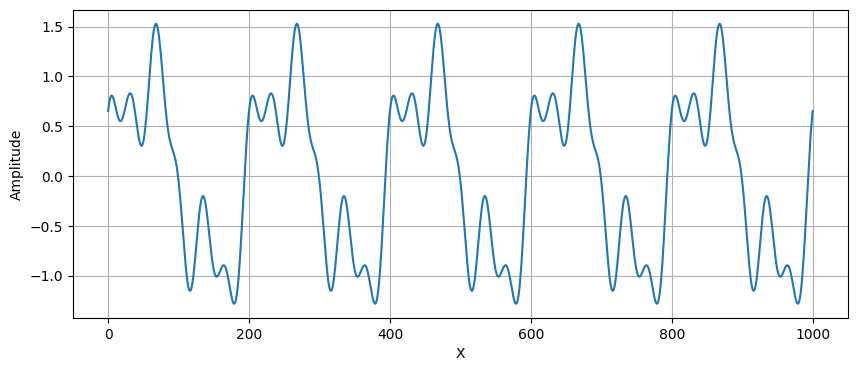

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_multi_sine_wave(length, frequencies, amplitudes, phases=None):
    """
    Generate a tensor (array) of the sum of multiple sine waves.
    Parameters:
    - length: Length of the output array (number of samples)
    - frequencies: List of frequencies for each sine wave (Hz)
    - amplitudes: List of amplitudes for each sine wave
    - phases: List of phases for each sine wave (radians). If None, all phases are 0.
    """
    if phases is None:
        phases = [0] * len(frequencies)
    if not (len(frequencies) == len(amplitudes) == len(phases)):
        raise ValueError("frequencies, amplitudes, and phases must have the same length")
    t = np.linspace(0, length, num=length)
    combined_wave = np.zeros_like(t)
    for freq, amp, phase in zip(frequencies, amplitudes, phases):
        combined_wave += amp * np.sin(2 * np.pi * freq * t + phase)
    return combined_wave

# User parameters - can specify any number of sine waves
length = 1000  # Number of samples
frequencies = [5, 15, 30]  # Frequencies of sine waves (Hz)
amplitudes = [1.0, 0.5, 0.3]  # Amplitudes of sine waves
phases = [0, np.pi/4, np.pi/2]  # Phases of sine waves (radians)
# Generate the waveform
waveform = generate_multi_sine_wave(length, frequencies, amplitudes, phases)
# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(waveform)  # Only plot first 200 samples for clarity
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [8]:
import os
from pathlib import Path

def generate_phase_varied_dataset(length, frequencies, amplitudes, 
                                 phase_range=(0, 1.8*np.pi), num_samples=100,
                                 dataset_name="sine_dataset"):
    """
    Generate a dataset of phase-varied sine wave combinations.
    - phase_range: Tuple of (min_phase, max_phase) in radians
    """
    # Create dataset directory
    dataset_dir = Path("datasets") / dataset_name
    dataset_dir.mkdir(parents=True, exist_ok=True)
    
    # Generate phase values spanning the range
    phases = np.linspace(phase_range[0], phase_range[1], num_samples)
    
    # Generate and save each sample
    for i, phase in enumerate(phases):
        # Create equal phases for all components (or modify this for different phase relationships)
        component_phases = [phase] * len(frequencies)
        
        # Generate the waveform
        waveform = generate_multi_sine_wave(length, frequencies, amplitudes, 
                                          component_phases)
        
        # Save as numpy array
        np.save(dataset_dir / f"sample_{i:04d}.npy", waveform)
    
    print(f"Generated {num_samples} samples in {dataset_dir}")

# Parameters
length = 1000
frequencies = [5, 15, 30]
amplitudes = [1.0, 0.5, 0.3]
phase_range = (0, 1.8*np.pi)
num_samples = 500

# Generate dataset
generate_phase_varied_dataset(length, frequencies, amplitudes, 
                           phase_range, num_samples)

Generated 500 samples in datasets\sine_dataset


Selected sample  258


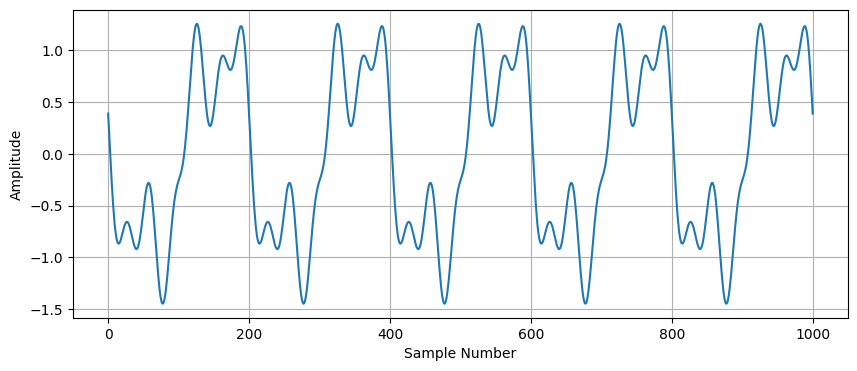

In [10]:
import random

dataset_dir = Path("datasets") / "sine_dataset"

# Get list of all samples
sample_files = sorted(dataset_dir.glob("sample_*.npy"))
if not sample_files:
    raise FileNotFoundError(f"No samples found in {dataset_dir}")

# Select a random sample
sample_file = random.choice(sample_files)
sample_idx = int(sample_file.stem.split('_')[1])
waveform = np.load(sample_file)
print ("Selected sample ", sample_idx)

# Plot the sample
plt.figure(figsize=(10, 4))
plt.plot(waveform)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()